<a href="https://colab.research.google.com/github/MohSokkary/AZO-vS-EGX30-vs-EGX30TR/blob/main/AZO_vs_EGX30_vs_EGX30TR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below i'll compare the performance of Azimut Opportunities mutual fund against two benchmark indexes, EGX30 and EGX30TR. AZO is an equity mutual fund  managed by Azimut Egypt, it began trading on the 30th of June 2021 and was marketed as an active mutual fund aiming to achieve 20% annual return and beat the Egyptian stock market by acheiving excess return, investment strategy as briefed by head of research back in November 2021: "Concentrated positions in a small number of stocks, making use of different quanitative, sector-specific and event driven strategies. allocation to equity can go from 93% to as low as 3% at times of extreme volatility."

In [ ]:
import pandas as pd
import numpy as np
import datetime as datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
AZO = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/AZO EGX 30 TR/AZO.csv')
EGX30 = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/AZO EGX 30 TR/EGX30.csv')
EGX30TR = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/AZO EGX 30 TR/EGX30TR.csv')

In [ ]:
EGX30

,???? EGX 30 ??? ????? ?????? - (????? ?? 30/06/2021 - ??? 24/03/2022 ),Unnamed: 1,Unnamed: 2,Unnamed: 3
0,???????,??????,???? ????,??? ????
1,10/4/2022,10897.61,11101.94,10872.94
2,7/4/2022,11101.94,11359.56,11091.16
3,6/4/2022,11347.96,11417.95,11319.85
4,5/4/2022,11380.85,11545.14,11375.44
...,...,...,...,...
190,6/7/2021,10154.79,10348.29,10147.51
191,5/7/2021,10348.29,10386.82,10345.66
192,4/7/2021,10345.66,10346.14,10256.62
193,30/06/2021,10256.62,10262.18,10122.86


In [ ]:
EGX30.drop(EGX30.columns[[2, 3]], axis = 1, inplace = True)
EGX30.columns = ['Date','Value']
EGX30 = EGX30.loc[1:]

In [ ]:
EGX30

,Date,Value
1,10/4/2022,10897.61
2,7/4/2022,11101.94
3,6/4/2022,11347.96
4,5/4/2022,11380.85
5,4/4/2022,11529.18
...,...,...
190,6/7/2021,10154.79
191,5/7/2021,10348.29
192,4/7/2021,10345.66
193,30/06/2021,10256.62


In [ ]:
EGX30.Date = pd.to_datetime(EGX30.Date, format='%d/%m/%Y')
EGX30.Value = pd.to_numeric (EGX30.Value)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
EGX30

,Date,Value
1,2022-04-10,10897.61
2,2022-04-07,11101.94
3,2022-04-06,11347.96
4,2022-04-05,11380.85
5,2022-04-04,11529.18
...,...,...
190,2021-07-06,10154.79
191,2021-07-05,10348.29
192,2021-07-04,10345.66
193,2021-06-30,10256.62


In [ ]:
EGX30 = EGX30.iloc[::-1].reset_index(drop=True)

In [ ]:
EGX30

,Date,Value
0,2021-06-29,10123.06
1,2021-06-30,10256.62
2,2021-07-04,10345.66
3,2021-07-05,10348.29
4,2021-07-06,10154.79
...,...,...
189,2022-04-04,11529.18
190,2022-04-05,11380.85
191,2022-04-06,11347.96
192,2022-04-07,11101.94


In [ ]:
EGX30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    194 non-null    datetime64[ns]
 1   Value   194 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [ ]:
EGX30['change'] = EGX30["Value"].pct_change()

In [ ]:
EGX30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    194 non-null    datetime64[ns]
 1   Value   194 non-null    float64       
 2   change  193 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.7 KB


In [ ]:
EGX30

,Date,Value,change
0,2021-06-29,10123.06,NaN
1,2021-06-30,10256.62,0.013194
2,2021-07-04,10345.66,0.008681
3,2021-07-05,10348.29,0.000254
4,2021-07-06,10154.79,-0.018699
...,...,...,...
189,2022-04-04,11529.18,-0.002857
190,2022-04-05,11380.85,-0.012866
191,2022-04-06,11347.96,-0.002890
192,2022-04-07,11101.94,-0.021680


In [ ]:
AZO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  194 non-null    object 
 1   Nav       194 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
AZO.columns = ['Date','NAV']
AZO.Date=pd.to_datetime(AZO.Date)
AZO['AZOchange'] = AZO["NAV"].pct_change()

In [ ]:
AZO

,Date,NAV,AZOchange
0,2021-06-29,10.00000,NaN
1,2021-06-30,10.01730,0.001730
2,2021-07-04,10.01770,0.000040
3,2021-07-05,10.02530,0.000759
4,2021-07-06,9.95183,-0.007328
...,...,...,...
189,2022-04-04,10.45799,0.000833
190,2022-04-05,10.45272,-0.000504
191,2022-04-06,10.43664,-0.001538
192,2022-04-07,10.30300,-0.012805


In [ ]:
AZO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       194 non-null    datetime64[ns]
 1   NAV        194 non-null    float64       
 2   AZOchange  193 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.7 KB


Text(0.5, 1.0, 'Daily return of EGX30 vs AZO')

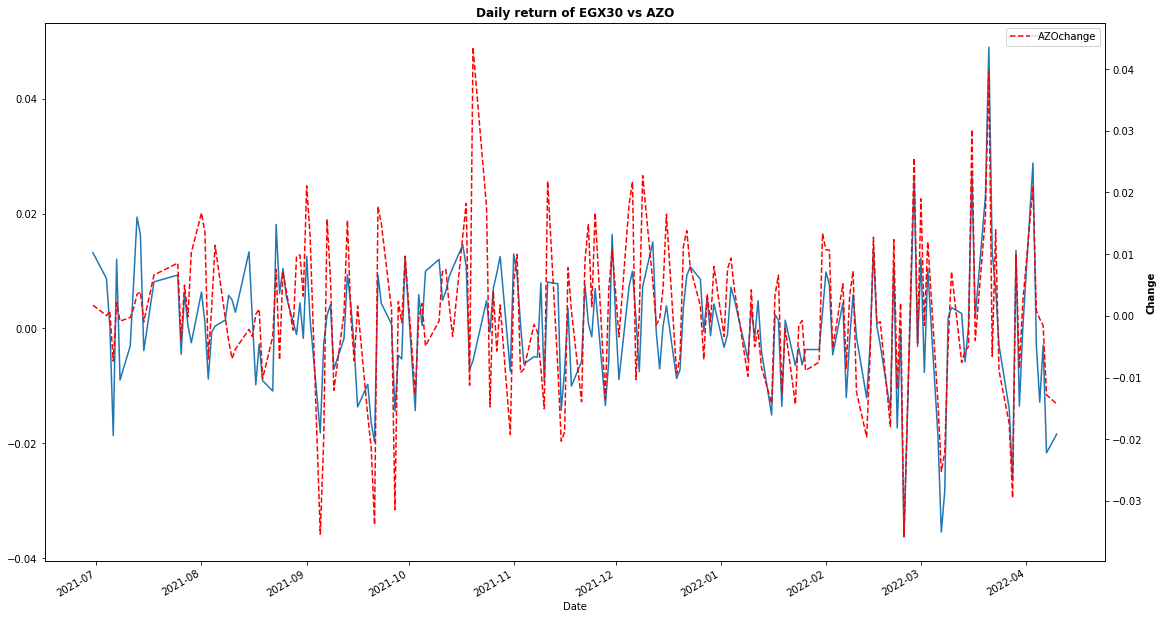

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
EGX30.plot(x="Date", y='change', ax=ax)
AZO.plot(x="Date", y='AZOchange', ax=ax2, ls="--", color = 'red')
plt.gcf().set_size_inches(19, 11)
plt.ylabel('Change', fontweight='bold')
plt.xlabel('Days', fontweight='bold')
plt.title('Daily return of EGX30 vs AZO', fontweight='bold')

In [ ]:
EGX30['change'].corr(AZO['AZOchange']).round(4)

0.7375

Correlation value of 0.7 between two variables would indicate that a significant and positive relationship exists between the two. A positive correlation signifies that if EGX30 goes up, then AZO will also go up. EGX30 isn'r equally weighted and constituents are known. This value can give a hint about AZO portfolio. This can be observed by scatter-plotting the daily returns as follows.


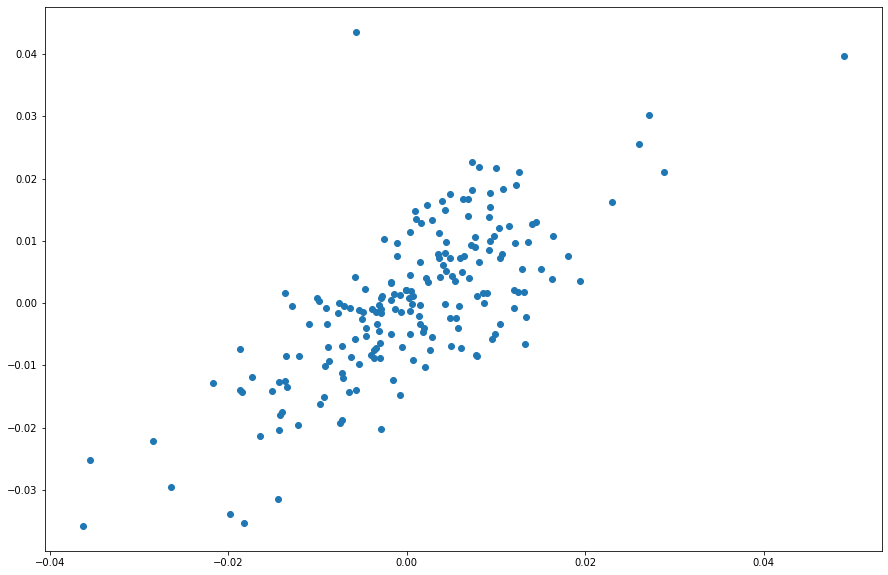

In [ ]:
plt.figure(figsize=(15, 10))
x = EGX30['change']
y = AZO['AZOchange']
plt.scatter(x, y)

In [ ]:
EGX30['change'].cov(AZO['AZOchange']).round(7)

0.0001008

Positive covariance between two variables indicates that these variables tend to be higher or lower at the same time. magnitude doesn't bear any significance to covariance calculation.

In [ ]:
value_df=pd.concat([AZO['AZOchange'],EGX30['change']], axis=1, keys=['AZOChange', 'EGX30Change'])

In [ ]:
value_df

,AZOChange,EGX30Change
0,NaN,NaN
1,0.001730,0.013194
2,0.000040,0.008681
3,0.000759,0.000254
4,-0.007328,-0.018699
...,...,...
189,0.000833,-0.002857
190,-0.000504,-0.012866
191,-0.001538,-0.002890
192,-0.012805,-0.021680


In [ ]:
value_df['delta'] = value_df.AZOChange - value_df.EGX30Change
value_df

,AZOChange,EGX30Change,delta
0,NaN,NaN,NaN
1,0.001730,0.013194,-0.011464
2,0.000040,0.008681,-0.008641
3,0.000759,0.000254,0.000504
4,-0.007328,-0.018699,0.011370
...,...,...,...
189,0.000833,-0.002857,0.003689
190,-0.000504,-0.012866,0.012362
191,-0.001538,-0.002890,0.001352
192,-0.012805,-0.021680,0.008875


In [ ]:
AZO_win_rate = ((value_df['delta'] > 0).sum())/len(value_df['delta'])
percentage = "{:.00%}".format(AZO_win_rate)
print('AZO win rate is ' + percentage)

AZO win rate is 52%


In [ ]:
EGX30TR

,???? EGX 30 TR ??? ????? ?????? - (????? ?? 29/06/2021 - ??? 10/04/2022 ),Unnamed: 1,Unnamed: 2,Unnamed: 3
0,???????,??????,???? ????,??? ????
1,10/4/2022,4351.75,4440.96,4342.67
2,7/4/2022,4438.81,4534.2,4426.96
3,6/4/2022,4522.69,4554.64,4506.43
4,5/4/2022,4536.45,4600.19,4523.17
...,...,...,...,...
190,6/7/2021,3987.71,4022.96,3941.24
191,5/7/2021,4022.94,4058.28,4018.35
192,4/7/2021,4033.64,4045.2,4004.79
193,30/06/2021,4004.79,4015.28,3943.72


In [ ]:
EGX30TR.drop(EGX30TR.columns[[2, 3]], axis = 1, inplace = True)
EGX30TR = EGX30TR.loc[1:]
EGX30TR.columns = ['Date','Value']
EGX30TR = EGX30TR.iloc[::-1].reset_index(drop=True)
EGX30TR.Date = pd.to_datetime(EGX30TR.Date, format='%d/%m/%Y')
EGX30TR.Value = pd.to_numeric (EGX30TR.Value)
EGX30TR['TRchange'] = EGX30TR["Value"].pct_change()
EGX30TR

,Date,Value,TRchange
0,2021-06-29,3944.57,NaN
1,2021-06-30,4004.79,0.015267
2,2021-07-04,4033.64,0.007204
3,2021-07-05,4022.94,-0.002653
4,2021-07-06,3987.71,-0.008757
...,...,...,...
189,2022-04-04,4555.70,-0.001770
190,2022-04-05,4536.45,-0.004225
191,2022-04-06,4522.69,-0.003033
192,2022-04-07,4438.81,-0.018546


Text(0.5, 1.0, 'Daily return of EGX30TR vs AZO')

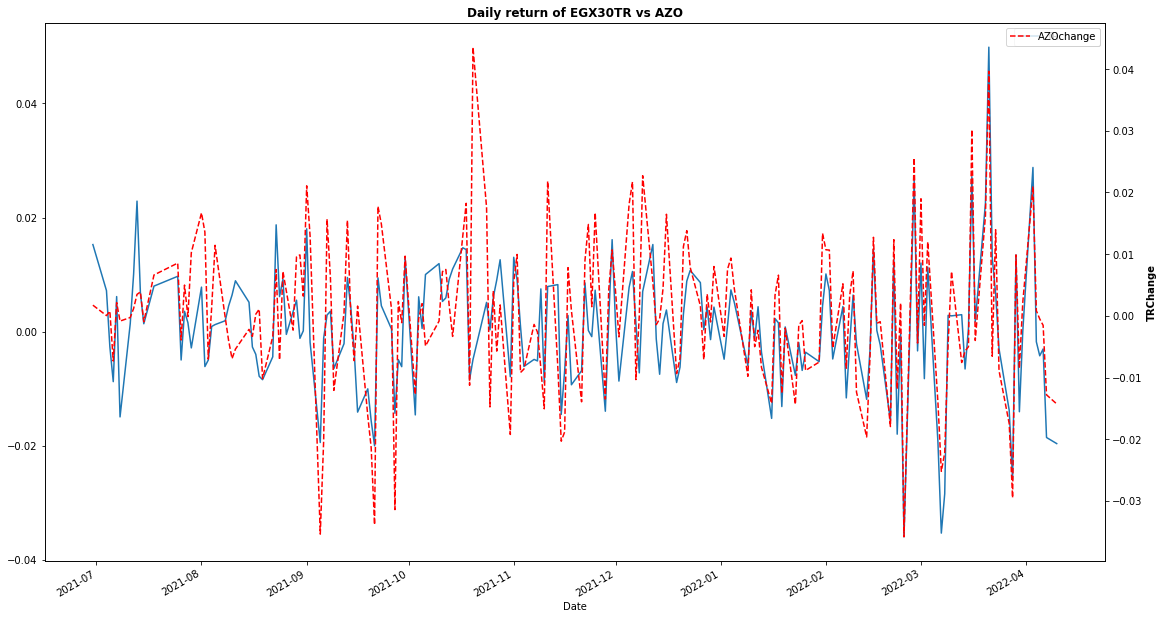

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
EGX30TR.plot(x="Date", y='TRchange', ax=ax)
AZO.plot(x="Date", y='AZOchange', ax=ax2, ls="--", color = 'red')
plt.gcf().set_size_inches(19, 11)
plt.ylabel('TRChange', fontweight='bold')
plt.xlabel('Days', fontweight='bold')
plt.title('Daily return of EGX30TR vs AZO', fontweight='bold')

In [ ]:
TR_value_df=pd.concat([AZO['AZOchange'],EGX30TR['TRchange']], axis=1, keys=['AZOChange', 'EGXTRChange'])
TR_value_df['TRdelta'] = value_df.AZOChange - TR_value_df.EGXTRChange
TR_value_df

,AZOChange,EGXTRChange,TRdelta
0,NaN,NaN,NaN
1,0.001730,0.015267,-0.013537
2,0.000040,0.007204,-0.007164
3,0.000759,-0.002653,0.003411
4,-0.007328,-0.008757,0.001429
...,...,...,...
189,0.000833,-0.001770,0.002603
190,-0.000504,-0.004225,0.003722
191,-0.001538,-0.003033,0.001495
192,-0.012805,-0.018546,0.005742


In [ ]:
AZO_TR_win_rate = ((TR_value_df['TRdelta'] > 0).sum())/len(TR_value_df['TRdelta'])
percentage = "{:.00%}".format(AZO_win_rate)
print('AZO win rate is ' + percentage + ' against EGX30TR')

AZO win rate is 52% against EGX30
